In [1]:
library('igraph')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
facebook_graph <- read.graph('facebook_combined.txt', format='edgelist', directed=FALSE)
is.connected(facebook_graph)

[1] TRUE

In [3]:
node_ids = c(1, 108, 349, 484, 1087)

In [7]:
core_nodes <- list()
for (n in 1:vcount(facebook_graph)) {
    neigh = neighbors(facebook_graph, n)
    if (length(neigh) > 200) {
        core_nodes = c(core_nodes, n)
    }
}
#core_nodes

In [36]:
mutual_friends = function(network, i, j) {
    neighbors1 = neighbors(network, i)
    neighbors2 = neighbors(network, j)
    return (intersect(neighbors1, neighbors2))
}

In [79]:
plot_embeddedness = function(network, node_id) {
    embeddedness_list <- numeric()
    personal_network = induced_subgraph(network, vids=c(neighbors(network, node_id)))
    vlist = V(personal_network)
    for (n in vlist) {
        if (n == node_id) next
        embeddedness_list <- c(embeddedness_list, length(mutual_friends(network, node_id, n)))
    }
    hist(embeddedness_list, breaks = seq(from = 0, to = max(embeddedness_list) + 1, by = 1), 
         xlab="Embeddedness",ylab="Frequency", main="Embeddedness Distribution")
}

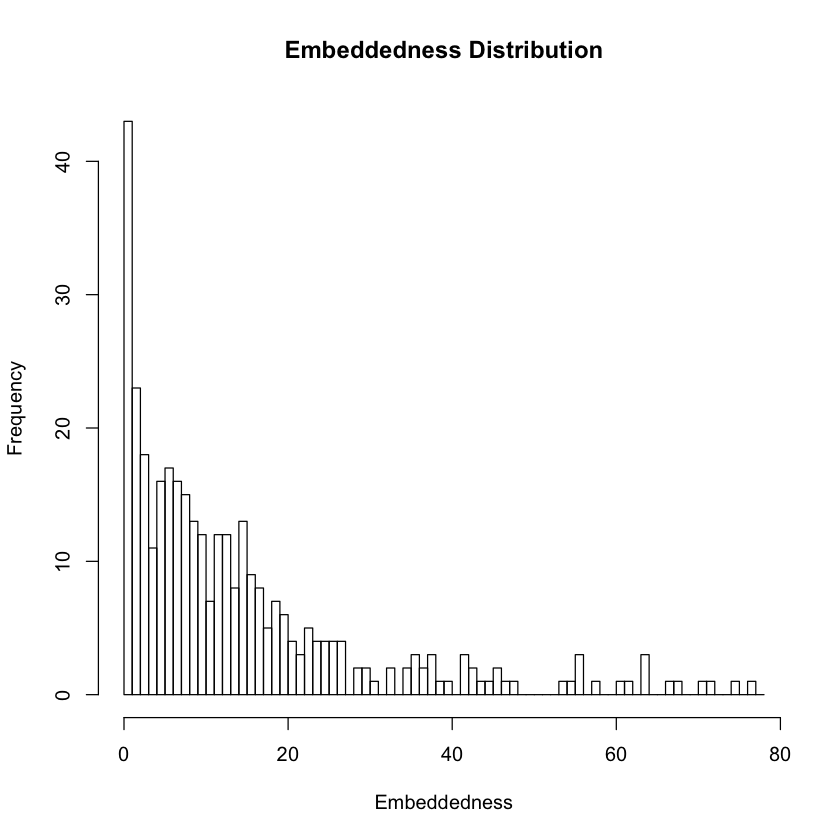

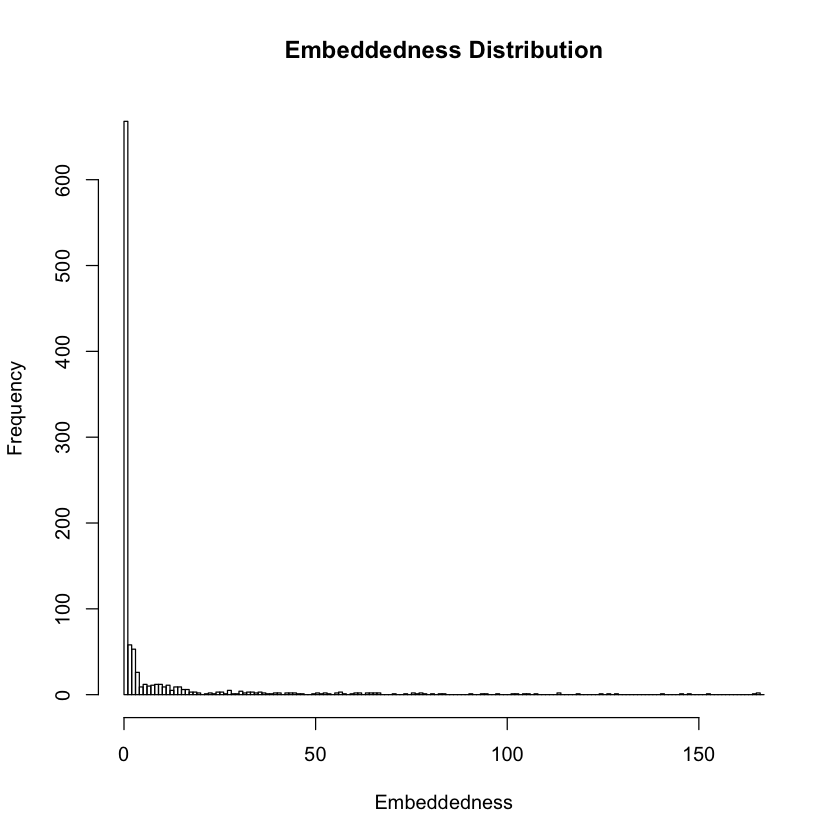

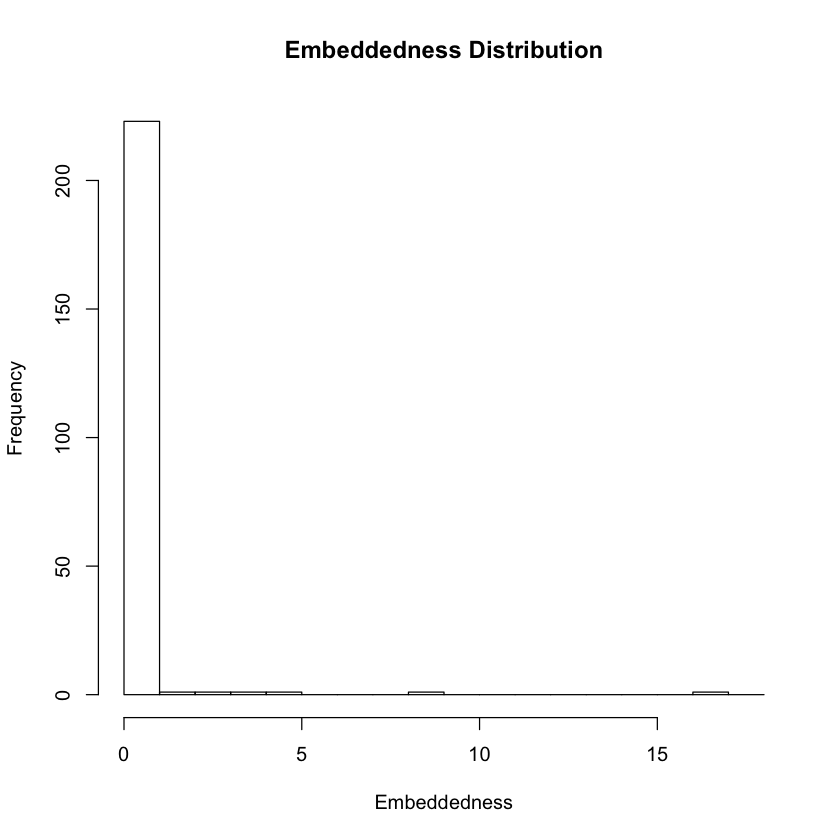

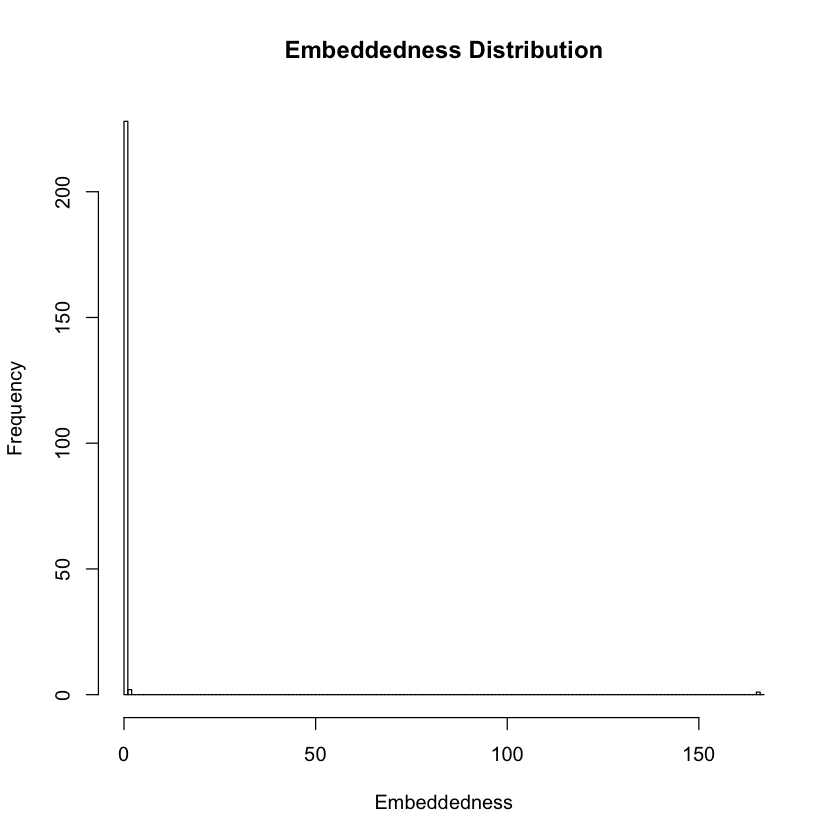

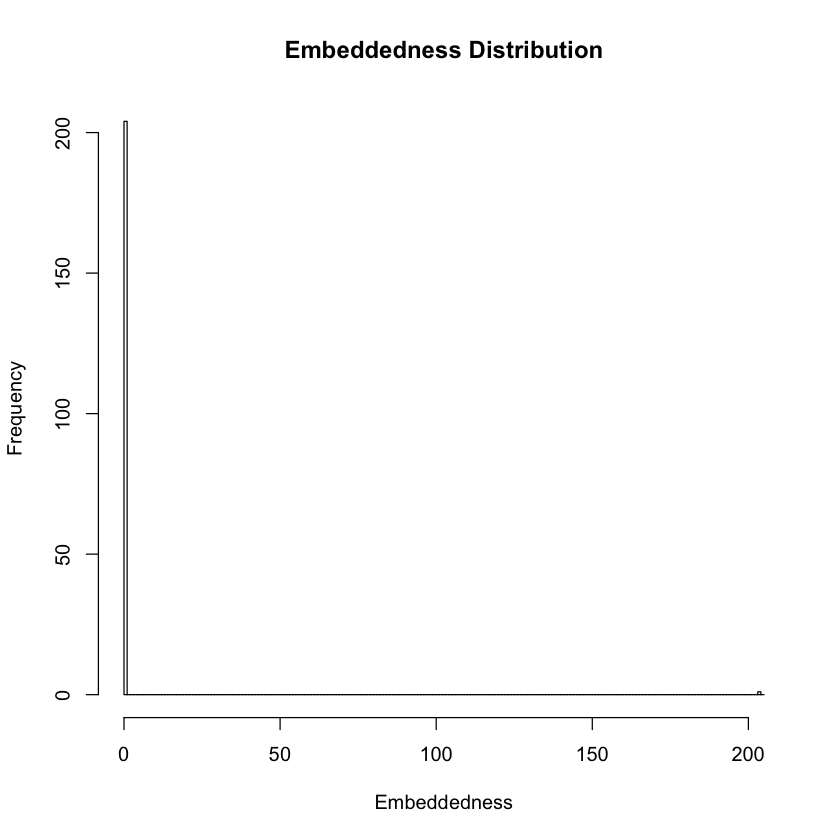

In [80]:
for (node in node_ids) {
    plot_embeddedness(facebook_graph, node)
}